In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
os.chdir('E:\\MLdataset')

In [4]:
x_5degree = pd.read_csv('x_5degree.csv',header=None)

In [5]:
x_5degree = x_5degree.to_numpy(dtype='float32')

In [6]:
x = x_5degree[:, 0:15]

In [7]:
x.shape

(1302, 15)

In [8]:
x = x.reshape(((72*3+1)*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(5deg).csv',header=None)

In [10]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [11]:
y = y_5degree.reshape(((72*3+1)*6, 100, 100))

In [12]:
tsr = x_5degree[:, -2]

In [13]:
theta = x_5degree[:, -1]

In [14]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [15]:
print(y_train.shape)

(1171, 100, 100)


In [16]:
print(y_test.shape)

(131, 100, 100)


In [17]:
print(x_train.shape)

(1171, 15, 1)


In [18]:
print(x_test.shape)

(131, 15, 1)


In [19]:
theta_train

array([ 600., 1065.,  430., ..., 1045., 1045.,  205.], dtype=float32)

In [20]:
tsr_train

array([2. , 1.6, 1.6, ..., 2. , 1.8, 2. ], dtype=float32)

In [21]:
os.chdir('C:\\Users\\User')

In [22]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [23]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape (Reshape)           (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             513000

In [24]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [25]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=2000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/2000
30/30 [==============================] - 1s 5ms/step - loss: 0.0108 - rmse: 0.1031
Epoch 2/2000
30/30 [==============================] - 0s 5ms/step - loss: 0.0095 - rmse: 0.0969
Epoch 3/2000
30/30 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0849
Epoch 4/2000
30/30 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0833
Epoch 5/2000
30/30 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0808
Epoch 6/2000
30/30 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0774
Epoch 7/2000
30/30 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0760
Epoch 8/2000
30/30 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0747
Epoch 9/2000
30/30 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0731
Epoch 10/2000
30/30 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0715
Epoch 11/2000
30/30 [==================

30/30 [==============================] - 0s 6ms/step - loss: 8.6794e-04 - rmse: 0.0265
Epoch 86/2000
30/30 [==============================] - 0s 6ms/step - loss: 8.5199e-04 - rmse: 0.0262
Epoch 87/2000
30/30 [==============================] - 0s 5ms/step - loss: 8.3878e-04 - rmse: 0.0259
Epoch 88/2000
30/30 [==============================] - 0s 5ms/step - loss: 8.2413e-04 - rmse: 0.0256
Epoch 89/2000
30/30 [==============================] - 0s 5ms/step - loss: 8.1041e-04 - rmse: 0.0253
Epoch 90/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.9970e-04 - rmse: 0.0251
Epoch 91/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.8371e-04 - rmse: 0.0248
Epoch 92/2000
30/30 [==============================] - 0s 6ms/step - loss: 7.7238e-04 - rmse: 0.0246
Epoch 93/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.5991e-04 - rmse: 0.0243
Epoch 94/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.5058e-04 - rmse: 0.0241
Epoc

30/30 [==============================] - 0s 5ms/step - loss: 3.6054e-04 - rmse: 0.0140
Epoch 166/2000
30/30 [==============================] - 0s 5ms/step - loss: 3.5754e-04 - rmse: 0.0139
Epoch 167/2000
30/30 [==============================] - 0s 5ms/step - loss: 3.5442e-04 - rmse: 0.0138
Epoch 168/2000
30/30 [==============================] - 0s 5ms/step - loss: 3.5514e-04 - rmse: 0.0138
Epoch 169/2000
30/30 [==============================] - 0s 5ms/step - loss: 3.5088e-04 - rmse: 0.0137
Epoch 170/2000
30/30 [==============================] - 0s 5ms/step - loss: 3.4920e-04 - rmse: 0.0136
Epoch 171/2000
30/30 [==============================] - 0s 5ms/step - loss: 3.4767e-04 - rmse: 0.0135
Epoch 172/2000
30/30 [==============================] - 0s 5ms/step - loss: 3.4474e-04 - rmse: 0.0134
Epoch 173/2000
30/30 [==============================] - 0s 6ms/step - loss: 3.4271e-04 - rmse: 0.0134
Epoch 174/2000
30/30 [==============================] - 0s 6ms/step - loss: 3.3928e-04 - rmse: 0.

30/30 [==============================] - 0s 5ms/step - loss: 2.4650e-04 - rmse: 0.0096
Epoch 246/2000
30/30 [==============================] - 0s 5ms/step - loss: 2.4607e-04 - rmse: 0.0096
Epoch 247/2000
30/30 [==============================] - 0s 5ms/step - loss: 2.4559e-04 - rmse: 0.0096
Epoch 248/2000
30/30 [==============================] - 0s 5ms/step - loss: 2.4456e-04 - rmse: 0.0096
Epoch 249/2000
30/30 [==============================] - 0s 5ms/step - loss: 2.4353e-04 - rmse: 0.0095
Epoch 250/2000
30/30 [==============================] - 0s 5ms/step - loss: 2.4339e-04 - rmse: 0.0095
Epoch 251/2000
30/30 [==============================] - 0s 5ms/step - loss: 2.4192e-04 - rmse: 0.0095
Epoch 252/2000
30/30 [==============================] - 0s 5ms/step - loss: 2.4044e-04 - rmse: 0.0094
Epoch 253/2000
30/30 [==============================] - 0s 5ms/step - loss: 2.4022e-04 - rmse: 0.0094
Epoch 254/2000
30/30 [==============================] - 0s 5ms/step - loss: 2.3997e-04 - rmse: 0.

30/30 [==============================] - 0s 5ms/step - loss: 1.9795e-04 - rmse: 0.0076
Epoch 326/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.9755e-04 - rmse: 0.0076
Epoch 327/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.9667e-04 - rmse: 0.0075
Epoch 328/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.9610e-04 - rmse: 0.0075
Epoch 329/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.9649e-04 - rmse: 0.0076
Epoch 330/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.9614e-04 - rmse: 0.0075
Epoch 331/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.9528e-04 - rmse: 0.0075
Epoch 332/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.9484e-04 - rmse: 0.0075
Epoch 333/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.9406e-04 - rmse: 0.0074
Epoch 334/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.9418e-04 - rmse: 0.

30/30 [==============================] - 0s 5ms/step - loss: 1.6975e-04 - rmse: 0.0065
Epoch 406/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.6907e-04 - rmse: 0.0065
Epoch 407/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.6897e-04 - rmse: 0.0065
Epoch 408/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.6861e-04 - rmse: 0.0065
Epoch 409/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.6787e-04 - rmse: 0.0064
Epoch 410/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.6755e-04 - rmse: 0.0064
Epoch 411/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.6735e-04 - rmse: 0.0064
Epoch 412/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.6799e-04 - rmse: 0.0065
Epoch 413/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.6774e-04 - rmse: 0.0065
Epoch 414/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.6721e-04 - rmse: 0.

30/30 [==============================] - 0s 5ms/step - loss: 1.4959e-04 - rmse: 0.0058
Epoch 486/2000
30/30 [==============================] - 0s 6ms/step - loss: 1.4899e-04 - rmse: 0.0058
Epoch 487/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.4888e-04 - rmse: 0.0058
Epoch 488/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.4873e-04 - rmse: 0.0058
Epoch 489/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.4850e-04 - rmse: 0.0058
Epoch 490/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.4930e-04 - rmse: 0.0059
Epoch 491/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.4923e-04 - rmse: 0.0059
Epoch 492/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.4813e-04 - rmse: 0.0058
Epoch 493/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.4789e-04 - rmse: 0.0058
Epoch 494/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.4794e-04 - rmse: 0.

30/30 [==============================] - 0s 5ms/step - loss: 1.3509e-04 - rmse: 0.0054
Epoch 566/2000
30/30 [==============================] - 0s 6ms/step - loss: 1.3462e-04 - rmse: 0.0054
Epoch 567/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.3429e-04 - rmse: 0.0054
Epoch 568/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.3455e-04 - rmse: 0.0054
Epoch 569/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.3432e-04 - rmse: 0.0054
Epoch 570/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.3381e-04 - rmse: 0.0054
Epoch 571/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.3365e-04 - rmse: 0.0054
Epoch 572/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.3365e-04 - rmse: 0.0054
Epoch 573/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.3374e-04 - rmse: 0.0054
Epoch 574/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.3411e-04 - rmse: 0.

30/30 [==============================] - 0s 5ms/step - loss: 1.2256e-04 - rmse: 0.0050
Epoch 646/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.2305e-04 - rmse: 0.0051
Epoch 647/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.2249e-04 - rmse: 0.0050
Epoch 648/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.2262e-04 - rmse: 0.0051
Epoch 649/2000
30/30 [==============================] - 0s 6ms/step - loss: 1.2252e-04 - rmse: 0.0051
Epoch 650/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.2274e-04 - rmse: 0.0051
Epoch 651/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.2254e-04 - rmse: 0.0051
Epoch 652/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.2179e-04 - rmse: 0.0050
Epoch 653/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.2162e-04 - rmse: 0.0050
Epoch 654/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.2167e-04 - rmse: 0.

30/30 [==============================] - 0s 5ms/step - loss: 1.1350e-04 - rmse: 0.0048
Epoch 726/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.1388e-04 - rmse: 0.0049
Epoch 727/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.1303e-04 - rmse: 0.0048
Epoch 728/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.1328e-04 - rmse: 0.0048
Epoch 729/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.1433e-04 - rmse: 0.0049
Epoch 730/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.1290e-04 - rmse: 0.0048
Epoch 731/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.1289e-04 - rmse: 0.0048
Epoch 732/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.1281e-04 - rmse: 0.0048
Epoch 733/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.1258e-04 - rmse: 0.0048
Epoch 734/2000
30/30 [==============================] - 0s 6ms/step - loss: 1.1217e-04 - rmse: 0.

30/30 [==============================] - 0s 5ms/step - loss: 1.0586e-04 - rmse: 0.0046
Epoch 806/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.0564e-04 - rmse: 0.0046
Epoch 807/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.0533e-04 - rmse: 0.0046
Epoch 808/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.0442e-04 - rmse: 0.0045
Epoch 809/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.0464e-04 - rmse: 0.0045
Epoch 810/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.0474e-04 - rmse: 0.0045
Epoch 811/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.0459e-04 - rmse: 0.0045
Epoch 812/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.0441e-04 - rmse: 0.0045
Epoch 813/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.0453e-04 - rmse: 0.0045
Epoch 814/2000
30/30 [==============================] - 0s 5ms/step - loss: 1.0420e-04 - rmse: 0.

30/30 [==============================] - 0s 5ms/step - loss: 9.8738e-05 - rmse: 0.0044
Epoch 886/2000
30/30 [==============================] - 0s 5ms/step - loss: 9.8645e-05 - rmse: 0.0044
Epoch 887/2000
30/30 [==============================] - 0s 5ms/step - loss: 9.8813e-05 - rmse: 0.0044
Epoch 888/2000
30/30 [==============================] - 0s 5ms/step - loss: 9.8371e-05 - rmse: 0.0044
Epoch 889/2000
30/30 [==============================] - 0s 5ms/step - loss: 9.8317e-05 - rmse: 0.0044
Epoch 890/2000
30/30 [==============================] - 0s 5ms/step - loss: 9.8198e-05 - rmse: 0.0044
Epoch 891/2000
30/30 [==============================] - 0s 6ms/step - loss: 9.8074e-05 - rmse: 0.0044
Epoch 892/2000
30/30 [==============================] - 0s 6ms/step - loss: 9.7974e-05 - rmse: 0.0044
Epoch 893/2000
30/30 [==============================] - 0s 5ms/step - loss: 9.8211e-05 - rmse: 0.0044
Epoch 894/2000
30/30 [==============================] - 0s 6ms/step - loss: 9.8178e-05 - rmse: 0.

30/30 [==============================] - 0s 6ms/step - loss: 9.3598e-05 - rmse: 0.0043
Epoch 966/2000
30/30 [==============================] - 0s 6ms/step - loss: 9.3151e-05 - rmse: 0.0043
Epoch 967/2000
30/30 [==============================] - 0s 5ms/step - loss: 9.2560e-05 - rmse: 0.0042
Epoch 968/2000
30/30 [==============================] - 0s 5ms/step - loss: 9.2490e-05 - rmse: 0.0042
Epoch 969/2000
30/30 [==============================] - 0s 5ms/step - loss: 9.2114e-05 - rmse: 0.0042
Epoch 970/2000
30/30 [==============================] - 0s 5ms/step - loss: 9.2595e-05 - rmse: 0.0042
Epoch 971/2000
30/30 [==============================] - 0s 5ms/step - loss: 9.2494e-05 - rmse: 0.0042
Epoch 972/2000
30/30 [==============================] - 0s 5ms/step - loss: 9.2509e-05 - rmse: 0.0042
Epoch 973/2000
30/30 [==============================] - 0s 5ms/step - loss: 9.2232e-05 - rmse: 0.0042
Epoch 974/2000
30/30 [==============================] - 0s 5ms/step - loss: 9.2103e-05 - rmse: 0.

30/30 [==============================] - 0s 5ms/step - loss: 8.9731e-05 - rmse: 0.0043
Epoch 1046/2000
30/30 [==============================] - 0s 5ms/step - loss: 8.7847e-05 - rmse: 0.0041
Epoch 1047/2000
30/30 [==============================] - 0s 5ms/step - loss: 8.7540e-05 - rmse: 0.0041
Epoch 1048/2000
30/30 [==============================] - 0s 5ms/step - loss: 8.7355e-05 - rmse: 0.0040
Epoch 1049/2000
30/30 [==============================] - 0s 5ms/step - loss: 8.7215e-05 - rmse: 0.0040
Epoch 1050/2000
30/30 [==============================] - 0s 5ms/step - loss: 8.7174e-05 - rmse: 0.0040
Epoch 1051/2000
30/30 [==============================] - 0s 5ms/step - loss: 8.6939e-05 - rmse: 0.0040
Epoch 1052/2000
30/30 [==============================] - 0s 5ms/step - loss: 8.7459e-05 - rmse: 0.0041
Epoch 1053/2000
30/30 [==============================] - 0s 5ms/step - loss: 8.7594e-05 - rmse: 0.0041
Epoch 1054/2000
30/30 [==============================] - 0s 5ms/step - loss: 8.7331e-05 -

30/30 [==============================] - 0s 5ms/step - loss: 8.3688e-05 - rmse: 0.0040
Epoch 1125/2000
30/30 [==============================] - 0s 5ms/step - loss: 8.4061e-05 - rmse: 0.0040
Epoch 1126/2000
30/30 [==============================] - 0s 5ms/step - loss: 8.3648e-05 - rmse: 0.0040
Epoch 1127/2000
30/30 [==============================] - 0s 5ms/step - loss: 8.4635e-05 - rmse: 0.0041
Epoch 1128/2000
30/30 [==============================] - 0s 5ms/step - loss: 8.4012e-05 - rmse: 0.0040
Epoch 1129/2000
30/30 [==============================] - 0s 6ms/step - loss: 8.3761e-05 - rmse: 0.0040
Epoch 1130/2000
30/30 [==============================] - 0s 5ms/step - loss: 8.3888e-05 - rmse: 0.0040
Epoch 1131/2000
30/30 [==============================] - 0s 5ms/step - loss: 8.3326e-05 - rmse: 0.0040
Epoch 1132/2000
30/30 [==============================] - 0s 5ms/step - loss: 8.3541e-05 - rmse: 0.0040
Epoch 1133/2000
30/30 [==============================] - 0s 5ms/step - loss: 8.2858e-05 -

30/30 [==============================] - 0s 5ms/step - loss: 7.9833e-05 - rmse: 0.0039
Epoch 1204/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.9958e-05 - rmse: 0.0039
Epoch 1205/2000
30/30 [==============================] - 0s 5ms/step - loss: 8.0065e-05 - rmse: 0.0039
Epoch 1206/2000
30/30 [==============================] - 0s 5ms/step - loss: 8.0431e-05 - rmse: 0.0039
Epoch 1207/2000
30/30 [==============================] - 0s 5ms/step - loss: 8.0244e-05 - rmse: 0.0039
Epoch 1208/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.9945e-05 - rmse: 0.0039
Epoch 1209/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.9723e-05 - rmse: 0.0039
Epoch 1210/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.9463e-05 - rmse: 0.0038
Epoch 1211/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.9368e-05 - rmse: 0.0038
Epoch 1212/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.9727e-05 -

30/30 [==============================] - 0s 5ms/step - loss: 7.6637e-05 - rmse: 0.0038
Epoch 1283/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.7150e-05 - rmse: 0.0038
Epoch 1284/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.6688e-05 - rmse: 0.0038
Epoch 1285/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.6969e-05 - rmse: 0.0038
Epoch 1286/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.6710e-05 - rmse: 0.0038
Epoch 1287/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.6110e-05 - rmse: 0.0037
Epoch 1288/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.5992e-05 - rmse: 0.0037
Epoch 1289/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.6346e-05 - rmse: 0.0038
Epoch 1290/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.6263e-05 - rmse: 0.0037
Epoch 1291/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.6249e-05 -

30/30 [==============================] - 0s 5ms/step - loss: 7.3401e-05 - rmse: 0.0036
Epoch 1362/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.3690e-05 - rmse: 0.0037
Epoch 1363/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.4021e-05 - rmse: 0.0037
Epoch 1364/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.4103e-05 - rmse: 0.0037
Epoch 1365/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.4482e-05 - rmse: 0.0038
Epoch 1366/2000
30/30 [==============================] - 0s 6ms/step - loss: 7.3714e-05 - rmse: 0.0037
Epoch 1367/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.3615e-05 - rmse: 0.0037
Epoch 1368/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.3821e-05 - rmse: 0.0037
Epoch 1369/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.3455e-05 - rmse: 0.0037
Epoch 1370/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.3775e-05 -

30/30 [==============================] - 0s 5ms/step - loss: 7.0970e-05 - rmse: 0.0036
Epoch 1441/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.1573e-05 - rmse: 0.0037
Epoch 1442/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.1801e-05 - rmse: 0.0037
Epoch 1443/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.2108e-05 - rmse: 0.0037
Epoch 1444/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.1760e-05 - rmse: 0.0037
Epoch 1445/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.0960e-05 - rmse: 0.0036
Epoch 1446/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.1073e-05 - rmse: 0.0036
Epoch 1447/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.0787e-05 - rmse: 0.0036
Epoch 1448/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.0766e-05 - rmse: 0.0036
Epoch 1449/2000
30/30 [==============================] - 0s 5ms/step - loss: 7.0519e-05 -

30/30 [==============================] - 0s 5ms/step - loss: 6.9340e-05 - rmse: 0.0036
Epoch 1520/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.9061e-05 - rmse: 0.0036
Epoch 1521/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.8652e-05 - rmse: 0.0035
Epoch 1522/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.8904e-05 - rmse: 0.0035
Epoch 1523/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.8916e-05 - rmse: 0.0035
Epoch 1524/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.8553e-05 - rmse: 0.0035
Epoch 1525/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.8697e-05 - rmse: 0.0035
Epoch 1526/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.9195e-05 - rmse: 0.0036
Epoch 1527/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.8863e-05 - rmse: 0.0036
Epoch 1528/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.9604e-05 -

30/30 [==============================] - 0s 5ms/step - loss: 6.6888e-05 - rmse: 0.0035
Epoch 1599/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.6582e-05 - rmse: 0.0034
Epoch 1600/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.6724e-05 - rmse: 0.0035
Epoch 1601/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.7017e-05 - rmse: 0.0035
Epoch 1602/2000
30/30 [==============================] - 0s 6ms/step - loss: 6.7237e-05 - rmse: 0.0035
Epoch 1603/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.6796e-05 - rmse: 0.0035
Epoch 1604/2000
30/30 [==============================] - 0s 6ms/step - loss: 6.6904e-05 - rmse: 0.0035
Epoch 1605/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.6517e-05 - rmse: 0.0034
Epoch 1606/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.7312e-05 - rmse: 0.0036
Epoch 1607/2000
30/30 [==============================] - 0s 6ms/step - loss: 6.6604e-05 -

30/30 [==============================] - 0s 5ms/step - loss: 6.5162e-05 - rmse: 0.0034
Epoch 1678/2000
30/30 [==============================] - 0s 6ms/step - loss: 6.5140e-05 - rmse: 0.0034
Epoch 1679/2000
30/30 [==============================] - 0s 6ms/step - loss: 6.4833e-05 - rmse: 0.0034
Epoch 1680/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.4516e-05 - rmse: 0.0034
Epoch 1681/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.4940e-05 - rmse: 0.0034
Epoch 1682/2000
30/30 [==============================] - 0s 6ms/step - loss: 6.5214e-05 - rmse: 0.0035
Epoch 1683/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.4812e-05 - rmse: 0.0034
Epoch 1684/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.4687e-05 - rmse: 0.0034
Epoch 1685/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.5148e-05 - rmse: 0.0035
Epoch 1686/2000
30/30 [==============================] - 0s 6ms/step - loss: 6.4727e-05 -

30/30 [==============================] - 0s 5ms/step - loss: 6.3323e-05 - rmse: 0.0034
Epoch 1757/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.3067e-05 - rmse: 0.0033
Epoch 1758/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.3063e-05 - rmse: 0.0033
Epoch 1759/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.3377e-05 - rmse: 0.0034
Epoch 1760/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.3142e-05 - rmse: 0.0034
Epoch 1761/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.2958e-05 - rmse: 0.0033
Epoch 1762/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.3607e-05 - rmse: 0.0034
Epoch 1763/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.3336e-05 - rmse: 0.0034
Epoch 1764/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.3264e-05 - rmse: 0.0034
Epoch 1765/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.2691e-05 -

30/30 [==============================] - 0s 5ms/step - loss: 6.1587e-05 - rmse: 0.0033
Epoch 1836/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.1239e-05 - rmse: 0.0032
Epoch 1837/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.1351e-05 - rmse: 0.0033
Epoch 1838/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.1305e-05 - rmse: 0.0033
Epoch 1839/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.1606e-05 - rmse: 0.0033
Epoch 1840/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.1308e-05 - rmse: 0.0033
Epoch 1841/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.1696e-05 - rmse: 0.0033
Epoch 1842/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.2123e-05 - rmse: 0.0034
Epoch 1843/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.1556e-05 - rmse: 0.0033
Epoch 1844/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.1928e-05 -

30/30 [==============================] - 0s 5ms/step - loss: 6.0514e-05 - rmse: 0.0033
Epoch 1915/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.0503e-05 - rmse: 0.0033
Epoch 1916/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.0311e-05 - rmse: 0.0033
Epoch 1917/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.0509e-05 - rmse: 0.0033
Epoch 1918/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.0229e-05 - rmse: 0.0033
Epoch 1919/2000
30/30 [==============================] - 0s 6ms/step - loss: 6.0236e-05 - rmse: 0.0033
Epoch 1920/2000
30/30 [==============================] - 0s 6ms/step - loss: 6.0071e-05 - rmse: 0.0032
Epoch 1921/2000
30/30 [==============================] - 0s 5ms/step - loss: 5.9962e-05 - rmse: 0.0032
Epoch 1922/2000
30/30 [==============================] - 0s 5ms/step - loss: 5.9872e-05 - rmse: 0.0032
Epoch 1923/2000
30/30 [==============================] - 0s 5ms/step - loss: 6.0100e-05 -

30/30 [==============================] - 0s 5ms/step - loss: 5.8947e-05 - rmse: 0.0032
Epoch 1994/2000
30/30 [==============================] - 0s 5ms/step - loss: 5.8881e-05 - rmse: 0.0032
Epoch 1995/2000
30/30 [==============================] - 0s 6ms/step - loss: 5.8644e-05 - rmse: 0.0032
Epoch 1996/2000
30/30 [==============================] - 0s 6ms/step - loss: 5.8861e-05 - rmse: 0.0032
Epoch 1997/2000
30/30 [==============================] - 0s 6ms/step - loss: 5.8622e-05 - rmse: 0.0032
Epoch 1998/2000
30/30 [==============================] - 0s 5ms/step - loss: 5.8988e-05 - rmse: 0.0032
Epoch 1999/2000
30/30 [==============================] - 0s 5ms/step - loss: 5.9089e-05 - rmse: 0.0032
Epoch 2000/2000
30/30 [==============================] - 0s 6ms/step - loss: 5.8805e-05 - rmse: 0.0032


In [26]:
time = end - start
print("Training time:", time)

Training time: 0:05:12.987178


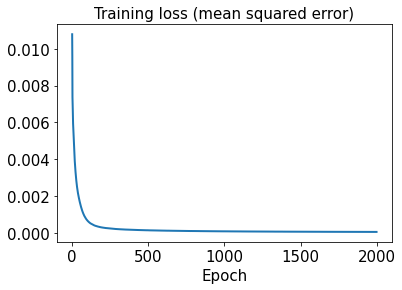

In [27]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

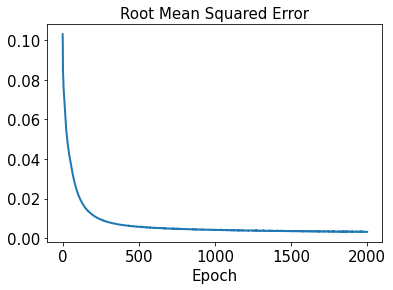

In [28]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [29]:
test_results = sd.evaluate(x_train)

37/37 [==============================] - 0s 1ms/step - loss: 4.8508e-05 - rmse: 0.0000e+00


In [30]:
decoded_train = sd.predict(x_train)

In [31]:
decoded_test = sd.predict(x_test)

In [32]:
error_train_abs = np.abs(decoded_train - y_train)

In [33]:
error_test_abs = np.abs(decoded_test - y_test)

In [34]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.0009376413


In [35]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.0024072358


In [36]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
#print(l2_error_train_list)

In [37]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
#print(l2_error_test_list)

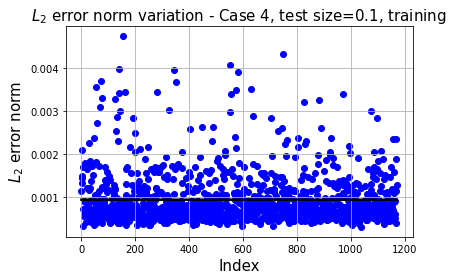

In [38]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - Case 4, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

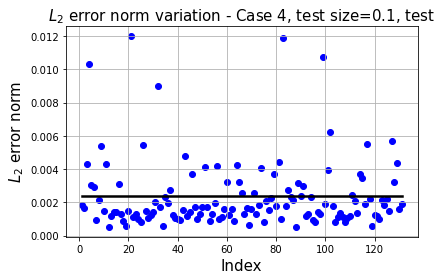

In [39]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - Case 4, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

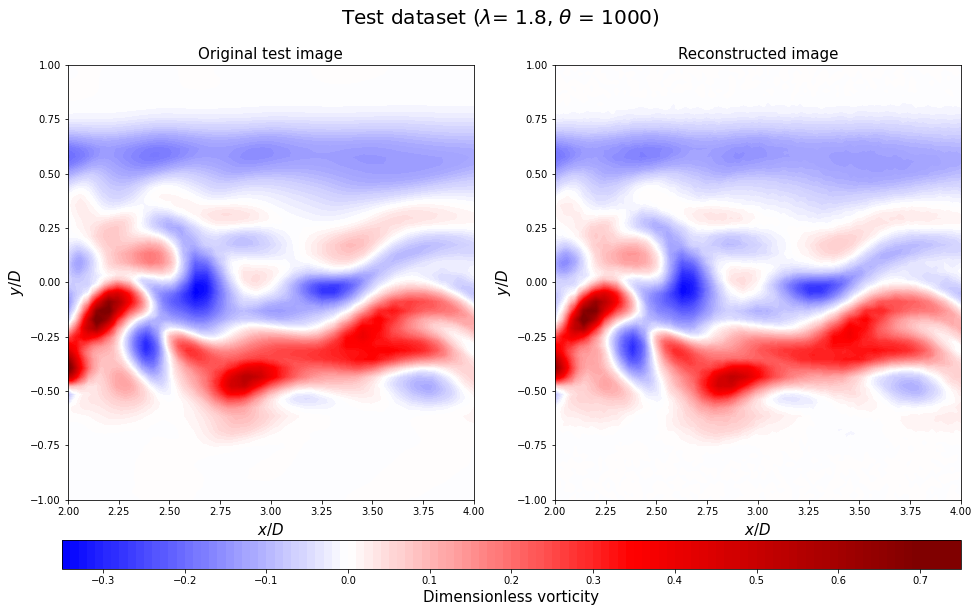

In [42]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

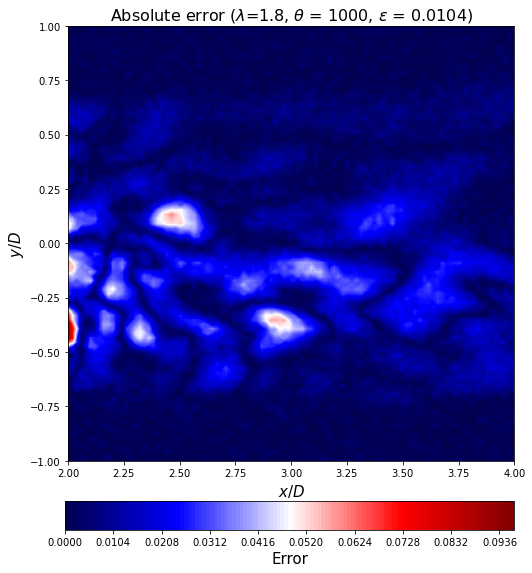

In [41]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()